In [1]:
import numpy as np

def nnmf(X, r, max_iter=1000, tol=1e-4, V=None, W=None):
    
    
    for t in range(max_iter):
        if V is None:
            V = np.random.rand(X.shape[0], r)
        if W is None:
            W = np.random.rand(r, X.shape[1])
            
        X_approx = np.dot(V, W)
        error = np.linalg.norm(X - X_approx, 'fro') ** 2
        
        # Check for convergence gpt used
        if error < tol:
            break

        V_num = np.dot(X, W.T)
        V_den = np.dot(np.dot(V, W), W.T)
        V = V * (V_num / V_den)  

        W_num = np.dot(V.T, X)
        W_den = np.dot(np.dot(V.T, V), W)
        W = W * (W_num / W_den)  

    return V, W

In [2]:
X1 = np.loadtxt('face.txt', delimiter=' ')  
print(X1.shape) 

(2429, 361)


Rank 10, runtime: 11.3582 seconds
Rank 20, runtime: 11.3069 seconds
Rank 30, runtime: 11.5555 seconds
Rank 40, runtime: 12.3063 seconds
Rank 50, runtime: 13.5693 seconds


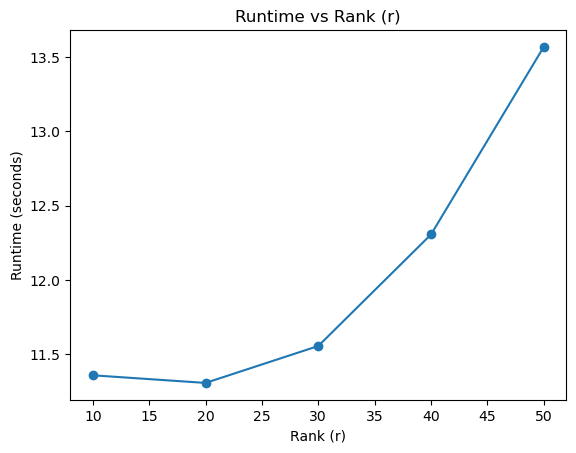

In [3]:
import time
import matplotlib.pyplot as plt

r_values = [10, 20, 30, 40, 50]
times = []

for r in r_values:
    start_time = time.time()
    V, W = nnmf(X1, r)
    end_time = time.time()
    runtime = end_time - start_time
    times.append(runtime)
    print(f"Rank {r}, runtime: {runtime:.4f} seconds")

plt.plot(r_values, times, marker='o')
plt.xlabel('Rank (r)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Rank (r)')
plt.show()


(2429, 361)


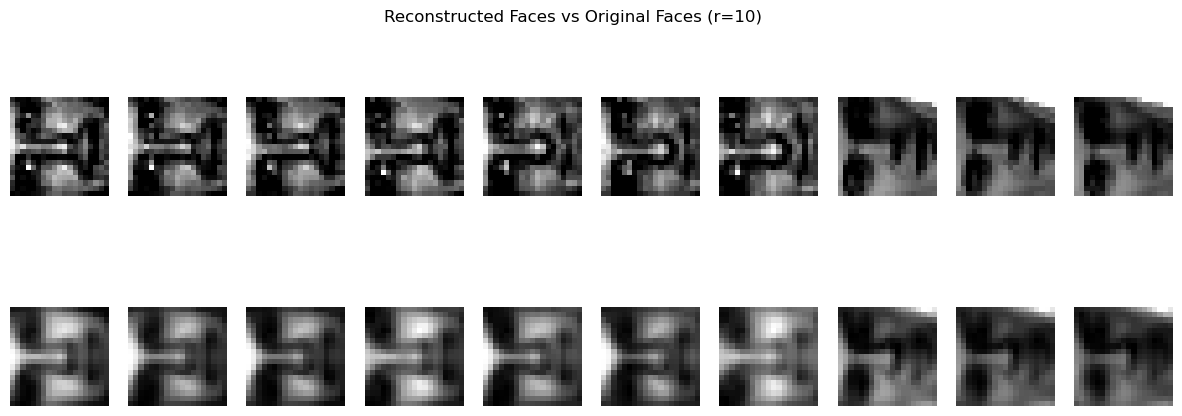

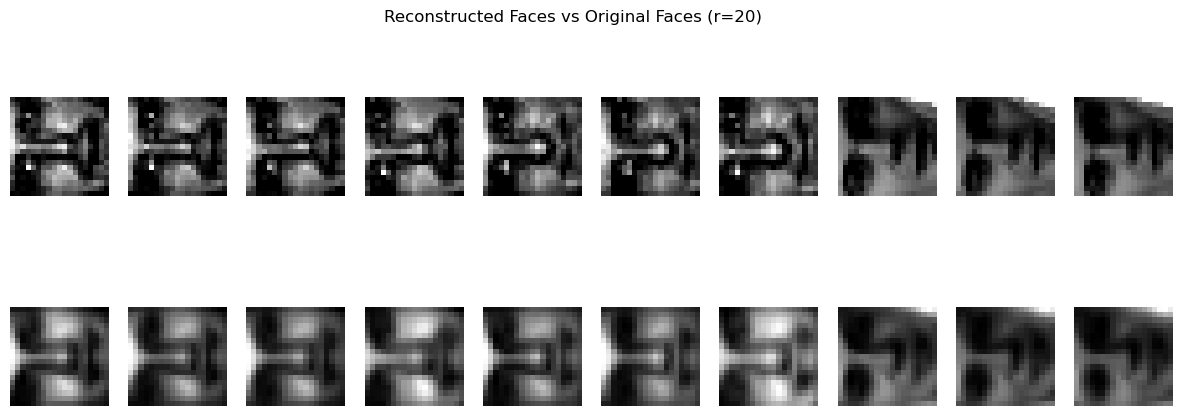

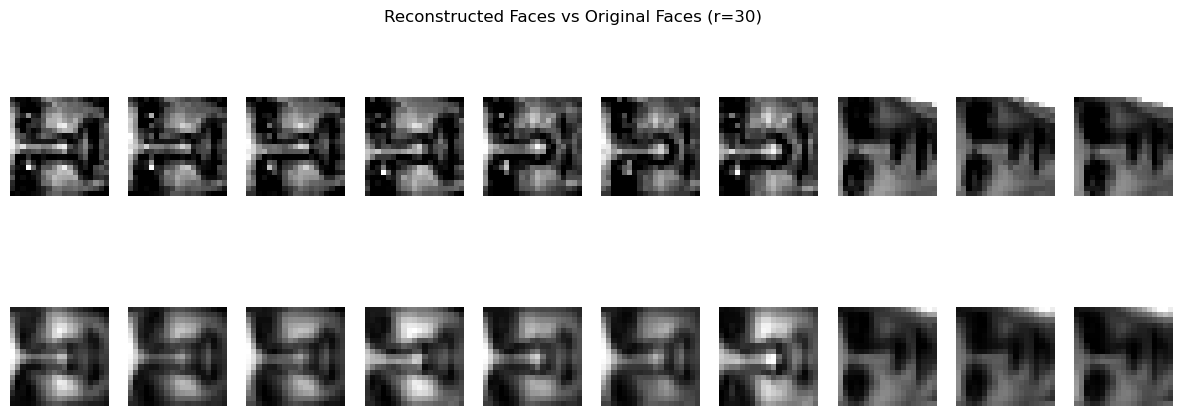

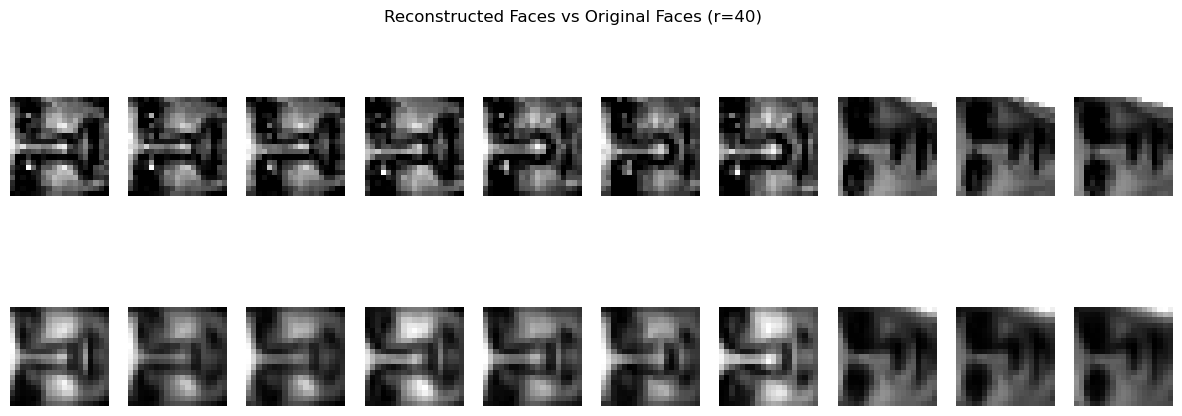

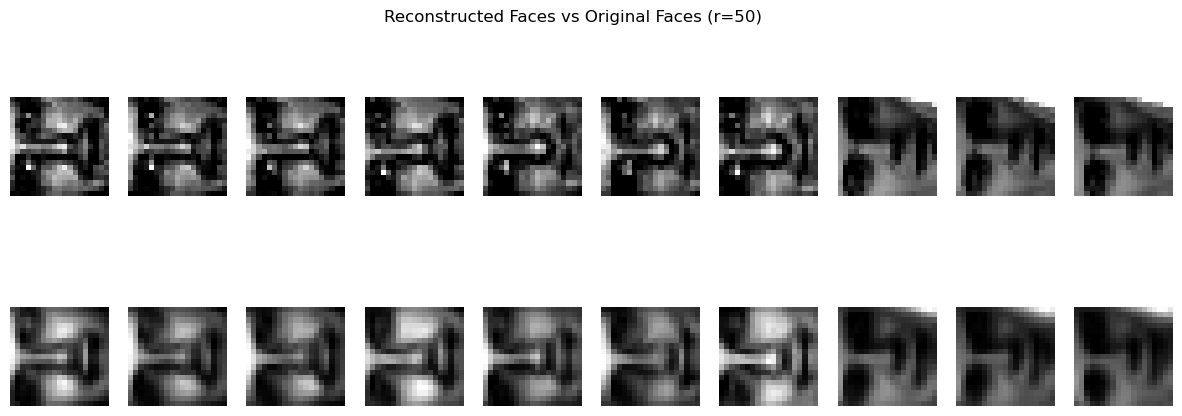

In [4]:
#gpt used
def plot_reconstructed_faces(X, V, W, num_images=10):
    X_approx = np.dot(V, W)  # 计算重构矩阵
    fig, axes = plt.subplots(2, num_images, figsize=(15, 5))
    for i in range(num_images):
        # 显示原始图像
        axes[0, i].imshow(X[i].reshape((19, 19)), cmap='gray')
        axes[0, i].axis('off')
        # 显示重构图像
        axes[1, i].imshow(X_approx[i].reshape((19, 19)), cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle(f'Reconstructed Faces vs Original Faces (r={V.shape[1]})')
    plt.show()

print(X1.shape)
for r in r_values:
    V, W = nnmf(X1, r)
    plot_reconstructed_faces(X1, V, W)



In [ ]:
#calculate the reconstruction error
def calculate_reconstruction_error(X, V, W):
    X_approx = np.dot(V, W)
    error = np.linalg.norm(X - X_approx, 'fro') ** 2
    return error


